<a href="https://colab.research.google.com/github/kmanoj94/CS809/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd

In [120]:
from google.colab import files
files.upload()

Saving Pollution.csv to Pollution (1).csv


{'Pollution.csv': b'CITY,SO2,MANUF,POP,TEMP,WIND,PRECIP-IN,PRECIP-DAY\r\nPhoenix,10,213,582,70.3,6,7.05,36\r\nLittle Rock,13,91,132,61,8.2,48.52,100\r\nSan Francisco,12,453,716,56.7,8.7,20.66,67\r\nDenver,17,454,515,51.9,9,12.95,86\r\nHartford,56,412,158,49.1,9,43.37,127\r\nWilmington,36,80,80,54,9,40.25,114\r\nWashington,29,434,757,57.3,9.3,38.89,111\r\nJacksonville,14,136,529,68.4,8.8,54.47,116\r\nMiami,10,207,335,75.5,9,59.8,128\r\nAtlanta,24,368,497,61.5,9.1,48.34,115\r\nChicago,110,3344,3369,50.6,10.4,34.44,122\r\nIndianapolis,28,361,746,52.3,9.7,38.74,121\r\nDes Moines,17,104,201,49,11.2,30.85,103\r\nWichita,8,125,277,56.6,12.7,30.58,82\r\nLouisville,30,291,593,55.6,8.3,43.11,123\r\nNew Orleans,9,204,361,68.3,8.4,56.77,113\r\nBaltimore,47,625,905,55,9.6,41.31,111\r\nDetroit,35,1064,1513,49.9,10.1,30.96,129\r\nMinneapolis-St. Paul,29,699,744,43.5,10.6,25.94,137\r\nKansas City,14,381,507,54.5,10,37,99\r\nSt. Louis,56,775,622,55.9,9.5,35.89,105\r\nOmaha,14,181,347,51.5,10.9,30.18,98

In [121]:
data=pd.read_csv("Pollution.csv")

In [122]:
data.shape

(41, 8)

In [123]:
data.head(41)

,CITY,SO2,MANUF,POP,TEMP,WIND,PRECIP-IN,PRECIP-DAY
0,Phoenix,10,213,582,70.3,6.0,7.05,36
1,Little Rock,13,91,132,61.0,8.2,48.52,100
2,San Francisco,12,453,716,56.7,8.7,20.66,67
3,Denver,17,454,515,51.9,9.0,12.95,86
4,Hartford,56,412,158,49.1,9.0,43.37,127
5,Wilmington,36,80,80,54.0,9.0,40.25,114
6,Washington,29,434,757,57.3,9.3,38.89,111
7,Jacksonville,14,136,529,68.4,8.8,54.47,116
8,Miami,10,207,335,75.5,9.0,59.80,128
9,Atlanta,24,368,497,61.5,9.1,48.34,115


In [124]:
CITY=data['CITY']
#dropping city fetaure because it's string value
Data=data.drop("CITY",axis=1)
print(Data.shape)


(41, 7)


In [125]:
#defining covariance matrix
cov_matrix=np.cov(Data.T)
print(cov_matrix)
cov_matrix.shape

[[ 5.50947561e+02  8.52772012e+03  6.71199451e+03 -7.35606707e+01
   3.17530488e+00  1.50017988e+01  2.29929878e+02]
 [ 8.52772012e+03  3.17502890e+05  3.11718814e+05 -7.73971341e+02
   1.91548110e+02 -2.15019902e+02  1.96895976e+03]
 [ 6.71199451e+03  3.11718814e+05  3.35371894e+05 -2.62349634e+02
   1.75930061e+02 -1.78052890e+02  6.45985976e+02]
 [-7.35606707e+01 -7.73971341e+02 -2.62349634e+02  5.22398780e+01
  -3.61135366e+00  3.28629884e+01 -8.24261585e+01]
 [ 3.17530488e+00  1.91548110e+02  1.75930061e+02 -3.61135366e+00
   2.04102439e+00 -2.18531098e-01  6.21439024e+00]
 [ 1.50017988e+01 -2.15019902e+02 -1.78052890e+02  3.28629884e+01
  -2.18531098e-01  1.38569384e+02  1.54792902e+02]
 [ 2.29929878e+02  1.96895976e+03  6.45985976e+02 -8.24261585e+01
   6.21439024e+00  1.54792902e+02  7.02590244e+02]]


(7, 7)

In [126]:
#defining correlation matrix
corr_matrix = pd.DataFrame.corr(Data, method='pearson')
print(corr_matrix)
corr_matrix.shape

                 SO2     MANUF       POP  ...      WIND  PRECIP-IN  PRECIP-DAY
SO2         1.000000  0.644769  0.493780  ...  0.094690   0.054294    0.369564
MANUF       0.644769  1.000000  0.955269  ...  0.237947  -0.032417    0.131829
POP         0.493780  0.955269  1.000000  ...  0.212644  -0.026119    0.042083
TEMP       -0.433600 -0.190042 -0.062678  ... -0.349740   0.386253   -0.430242
WIND        0.094690  0.237947  0.212644  ...  1.000000  -0.012994    0.164106
PRECIP-IN   0.054294 -0.032417 -0.026119  ... -0.012994   1.000000    0.496097
PRECIP-DAY  0.369564  0.131829  0.042083  ...  0.164106   0.496097    1.000000

[7 rows x 7 columns]


(7, 7)

In [143]:
#finding eigen values and eigen vectors 
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [144]:
#eigen vector values
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[-1.68607518e-02 -9.98356252e-02 -2.08775573e-01 -9.58831063e-01
  -1.52191203e-01 -5.39529110e-02 -2.70413759e-02]
 [-6.96832794e-01 -7.10249079e-01  6.71822007e-02  7.31978785e-02
  -9.64365414e-03 -2.15302321e-03  1.13620790e-03]
 [-7.17028451e-01  6.92912523e-01 -5.66669352e-02 -4.90666865e-02
   1.07354573e-02  2.91575116e-03 -5.68200558e-05]
 [ 1.14177937e-03  2.58143904e-02  7.16007449e-02  1.10147840e-01
  -4.77854201e-01 -8.52534945e-01 -1.64050698e-01]
 [-4.06752976e-04 -1.01168043e-03 -5.38660645e-03  1.50660878e-02
   2.54019170e-02  1.76541256e-01 -9.83834710e-01]
 [ 4.33692181e-04  1.22593675e-03 -2.65807619e-01  1.62617123e-01
  -8.32729325e-01  4.53206155e-01  6.37678770e-02]
 [-2.88369500e-03 -6.91550513e-02 -9.34279828e-01  1.84590521e-01
   2.32812295e-01 -1.83568735e-01 -1.89145450e-02]]


In [145]:
#printing eigen values
print('\nEigen Values \n %s' %eig_values)


Eigen Values 
 [6.38471962e+05 1.48120379e+04 7.01959940e+02 2.05001941e+02
 1.16704681e+02 1.20570493e+01 1.44870440e+00]


In [148]:
#from first two eigen values we are getting 99% variances
(100*(eig_values[0] / sum(eig_values)))+(100*(eig_values[1] / sum(eig_values)))

99.84148880397618

In [150]:
eig_vectors.T[0]

array([-1.68607518e-02, -6.96832794e-01, -7.17028451e-01,  1.14177937e-03,
       -4.06752976e-04,  4.33692181e-04, -2.88369500e-03])

In [149]:
eig_vectors.T[1]

array([-0.09983563, -0.71024908,  0.69291252,  0.02581439, -0.00101168,
        0.00122594, -0.06915505])

In [151]:
Projected_X = Data.dot(eig_vectors.T[0])

In [152]:
Projected_y = Data.dot(eig_vectors.T[1])

In [153]:
result = pd.DataFrame(Projected_X, columns=['PC1'])
result['PC2'] = Projected_y

In [154]:
result.head(41)

,PC1,PC2
0,-565.927480,250.321421
1,-158.479743,20.244283
2,-829.383003,170.031320
3,-686.105157,28.098865
4,-401.624828,-196.204378
5,-113.969176,-11.430467
6,-845.946515,207.232668
7,-474.549728,262.360743
8,-384.878162,77.267125
9,-613.446409,74.294617


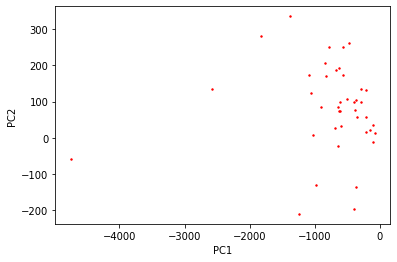

In [156]:
#scatterd plot of pca
import matplotlib.pyplot as plt
ax1 = result.plot.scatter(x='PC1',y='PC2',s=2,c='red')
plt.show()
